In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from train_QIF import *
from run_QIF import *
from genw_sparse import *

In [3]:
# parameters
N = 100
m = 0
std = 1/np.sqrt(N)
p = 1

T = 1000 # ms 
stim_on = 0 # ms
stim_off = 1000 # ms
dt = 0.1 # ms
nloop = 10
train_every = 2 # ms

timesteps = int(T/dt) # unitless, total number of timesteps

tau = 1 # ms, neuron phase decay constant
tau_s = 20 # ms, spike train decay constant 
lam = 1 # learning rate constant

neuron_params = N, tau, tau_s, lam
time_params = T, stim_on, stim_off, dt
train_params = nloop, train_every

run_time = T # ms

In [4]:
def gen_inp_stim(N, fout):
    inp_w = sp.stats.uniform.rvs(size = N)
    return np.outer(inp_w, fout)

In [5]:
driven_w = genw_sparse(N, m, std, p)
raw_waveforms = np.transpose(np.load("raw_form.npy"))
fout = raw_waveforms[0][0:10000]
stim = gen_inp_stim(N, fout)

In [6]:
spks, sdrive, thetas = run_QIF(neuron_params, time_params, driven_w, stim, run_time)

Text(0.5, 1.0, 'Sample driven neuronal behavior')

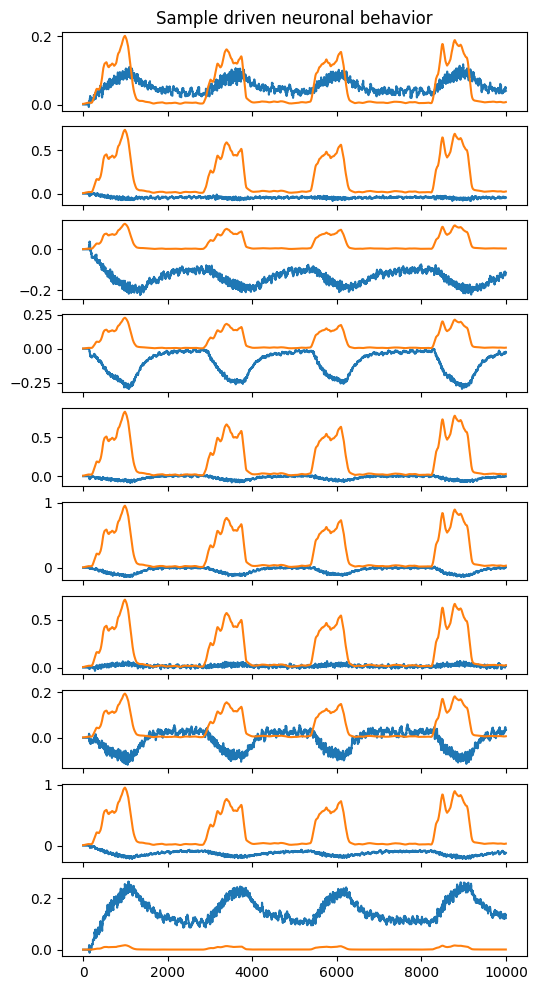

In [7]:
n_plot = 10

fig, axs = plt.subplots(n_plot, 1, figsize = (6, 12), sharex = True)
for i in range(n_plot):
    axs[i].plot(sdrive[i])
    axs[i].plot(stim[i])

axs[0].set_title("Sample driven neuronal behavior")

In [8]:
out_w = (2*sp.stats.uniform.rvs(size = (N, N)) - 1)/np.sqrt(3/N)
aux_targs = np.dot(out_w, sdrive)

In [9]:
np.shape(aux_targs)

(100, 10000)

In [11]:
def gen_rand_stim(N, timesteps):
    stim = np.zeros((N, timesteps))
    for row in range(N):
        rstim = 2 * sp.stats.uniform.rvs(0, 1) - 1 # random stim weight from -1, 1
        stim[row][int(stim_on/dt):int(stim_off/dt)] = rstim
    return stim

In [12]:
W_trained = genw_sparse(N, m, std, 0.3)
W = np.copy(W_trained)
r_stim = gen_rand_stim(N, timesteps)

In [18]:
time_params_t = T, stim_on, 50, dt

In [19]:
W_trained, spks_t, sdrive_t, thetas_t, spk_rast_t = train_QIF(neuron_params, time_params_t, train_params, W, r_stim, aux_targs)

0
1
2
3
4
5
6
7
8
9


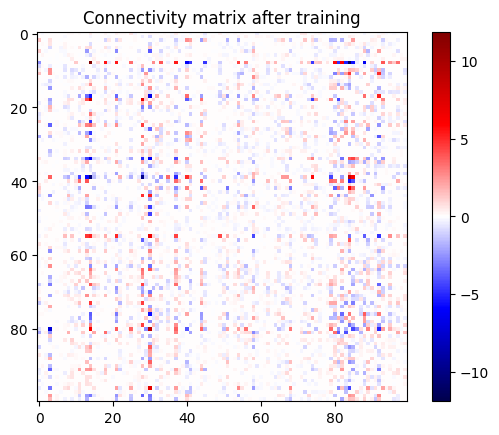

In [25]:
plt.imshow(W_trained, cmap=plt.get_cmap('seismic'), vmin = -(max(-1*np.min(W_trained), np.max(W_trained))), vmax = (max(-1*np.min(W_trained), np.max(W_trained))))
plt.title("Connectivity matrix after training")
plt.colorbar()

C:\Users\sq373\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


Text(0.5, 1.0, 'Clustered connectivity matrix after training')

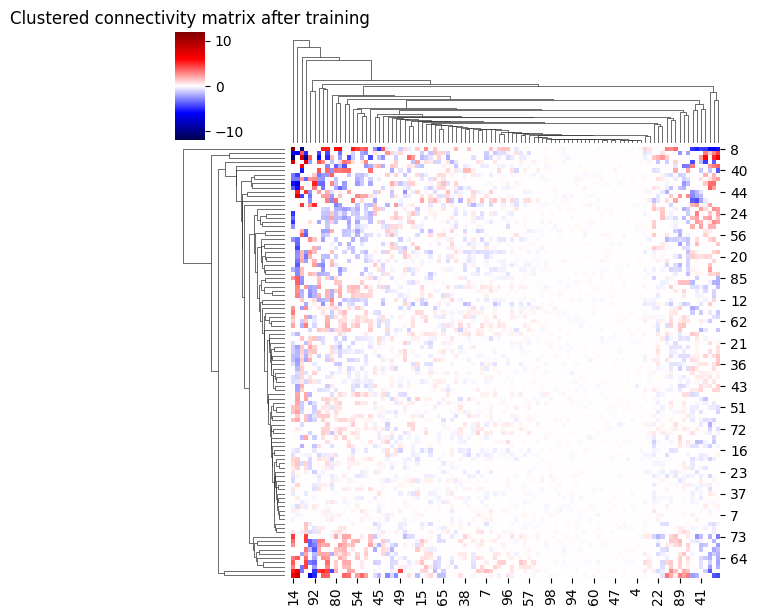

In [26]:
sns.clustermap(W_trained, cmap=plt.get_cmap('seismic'), vmin = -(max(-1*np.min(W_trained), np.max(W_trained))), vmax = (max(-1*np.min(W_trained), np.max(W_trained))), figsize = (6, 6))
plt.title("Clustered connectivity matrix after training")

Text(0.5, 1.0, 'Auxillary targets')

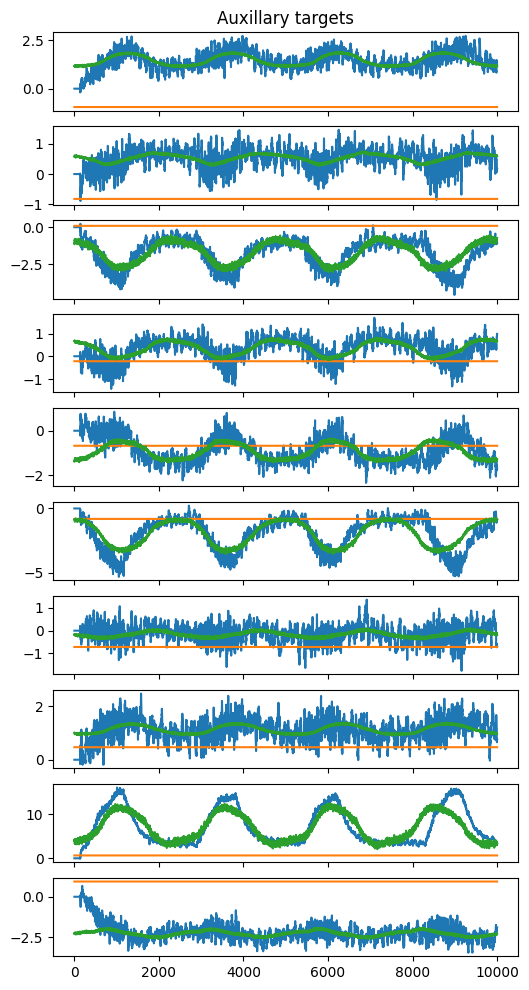

In [24]:
n_plot = 10

fig, axs = plt.subplots(n_plot, 1, figsize = (6, 12), sharex = True)
for i in range(n_plot):
    axs[i].plot(aux_targs[i])
    axs[i].plot(r_stim[i])
    axs[i].plot(sdrive_t[i][(nloop - 1)*int(T/dt):nloop*int(T/dt)])
axs[0].set_title("Auxillary targets")